# Download the Fashion MNIST dataset.

In [1]:
# download training images 
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O ./horse-or-human.zip

# download validation images
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O ./validation-horse-or-human.zip

--2023-01-01 06:06:32--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.16.128, 142.251.45.16, 142.251.163.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.16.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘./horse-or-human.zip’

./horse-or-human.zi 100%[===================>] 142.65M   262MB/s    in 0.5s    

2023-01-01 06:06:33 (262 MB/s) - ‘./horse-or-human.zip’ saved [149574867/149574867]

--2023-01-01 06:06:33--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.16.128, 142.251.45.16, 142.251.163.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.16.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 

# Download collected humans and horses images.

In [2]:
# download testing images
!gdown https://drive.google.com/uc?id=1NruTnQ_9M9T5J5jsDBdYmdS6fkqyj2Jy -O ./test-images.zip

Downloading...
From: https://drive.google.com/uc?id=1NruTnQ_9M9T5J5jsDBdYmdS6fkqyj2Jy
To: /content/test-images.zip
100% 1.31M/1.31M [00:00<00:00, 175MB/s]


# Unzip those data.

In [3]:
import os
import zipfile

# unzip training images 
local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horse-or-human')
# unzip validation images 
local_zip = './validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./validation-horse-or-human')
# unzip testing images 
local_zip = './test-images.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./')

zip_ref.close()


# Import Libraries

In [4]:
import keras
from keras.preprocessing.image import ImageDataGenerator # for data augmentation 

import matplotlib.pyplot as plt

In [5]:
keras.__version__

'2.9.0'

# Load Data

In [6]:
# For Training : Here we have 500 Horse images and 527 Human (Including Mal and Female) images.
for dirname, _, filenames in os.walk('./horse-or-human'):
    Image_Count = 0
    print(dirname)   
    for file in filenames:
        Image_Count += 1
    
    if Image_Count > 0:
        print('Total Files in directory {} is {}'.format(dirname, Image_Count))

./horse-or-human
./horse-or-human/humans
Total Files in directory ./horse-or-human/humans is 527
./horse-or-human/horses
Total Files in directory ./horse-or-human/horses is 500


In [7]:
# For validation : we have 128 Horse images and 128 Human images.

for dirname, _, filenames in os.walk('./validation-horse-or-human'):
    Image_Count = 0
    print(dirname)   
    for file in filenames:
        Image_Count += 1
    
    if Image_Count > 0:
        print('Total Files in directory {} is {}'.format(dirname, Image_Count))

./validation-horse-or-human
./validation-horse-or-human/humans
Total Files in directory ./validation-horse-or-human/humans is 128
./validation-horse-or-human/horses
Total Files in directory ./validation-horse-or-human/horses is 128


In [8]:
train_path = './horse-or-human'
val_path = './validation-horse-or-human'

# Data Processing

In [9]:
training_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

In [10]:
training_data = training_datagen.flow_from_directory(
    directory = train_path,
    target_size = (150, 150),   # Setting the size of output images to have in same size.
    batch_size = 32,
    class_mode = 'binary',
    shuffle=True,
    seed=42
)

Found 1027 images belonging to 2 classes.


In [11]:
training_data.class_indices

{'horses': 0, 'humans': 1}

In [12]:
training_data

In [13]:
# Doing the same for validation dataset.
# But here we do not need to generate the images for Validation, so we just use rescale.
valid_datagen = ImageDataGenerator(rescale = 1./255)

valid_data = valid_datagen.flow_from_directory(
    directory = val_path,
    target_size = (150, 150),   # Setting the size of output images to have in same size.
    batch_size = 32,
    class_mode = 'binary'
)

Found 256 images belonging to 2 classes.


# Plot the Images

In [14]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1,5,figsize = (20, 20))
    axes = axes.flatten()
    
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        
    plt.tight_layout()
    plt.show()

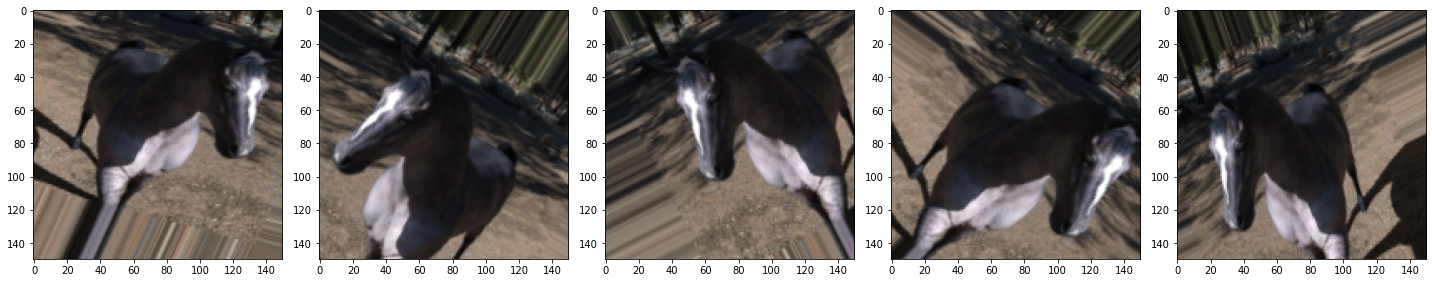

In [15]:
images_to_show = [training_data[0][0][0] for i in range(5)] # taking 5 images.
plotImages(images_to_show)

# Buidling CNN Model

In [16]:
model = keras.models.Sequential(
    [
        keras.layers.Conv2D(filters = 32, kernel_size = 3, input_shape = [150, 150, 3]),
        keras.layers.MaxPooling2D(pool_size = (2,2)),
        keras.layers.Conv2D(filters = 64, kernel_size = 3),
        keras.layers.MaxPooling2D(pool_size = (2,2)),
        keras.layers.Conv2D(filters = 128, kernel_size = 3),
        keras.layers.MaxPooling2D(pool_size = (2,2)),
        keras.layers.Conv2D(filters = 256, kernel_size = 3),
        keras.layers.MaxPooling2D(pool_size = (2,2)),
        
        keras.layers.Dropout(0.5),
        
        # Neural Network Building
        keras.layers.Flatten(),
        keras.layers.Dense(units = 128, activation = 'relu'), # Input Layer
        keras.layers.Dropout(0.1),
        keras.layers.Dense(units = 256, activation = 'relu'), # Hidden Layer
        keras.layers.Dropout(0.25),
        keras.layers.Dense(units = 2, activation = 'softmax'), # Output Layer
    ]
)

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

# Compile Model

In [18]:
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

In [19]:
model.compile(
    optimizer = Adam(learning_rate=0.0001),
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [39]:
# h.h5 for the Hierarchical Data Format version 5 (HDF5), is an open source file format that supports large, complex, heterogeneous data.
# After we have trained a good model checkpoint, it can be to convert into a deployabe format e.g. ONNX model through TensorRT.
model_path = './working/horse_human_model.h5'
checkpoint = ModelCheckpoint(model_path, monitor = 'val_accuracy', verbose = 1, save_best_only = True, mode = 'max')
callbacks_list = [checkpoint]

In [21]:
history = model.fit(
    training_data,
    epochs = 100,
    verbose = 1,
    validation_data = valid_data,
    callbacks = callbacks_list
)

Epoch 1/100
33/33 [==============================] - ETA: 0s - loss: 0.6915 - accuracy: 0.5394
Epoch 1: val_accuracy improved from -inf to 0.56250, saving model to ./working/horse_human_model.h5
33/33 [==============================] - 24s 355ms/step - loss: 0.6915 - accuracy: 0.5394 - val_loss: 0.6227 - val_accuracy: 0.5625
Epoch 2/100
33/33 [==============================] - ETA: 0s - loss: 0.6349 - accuracy: 0.6426
Epoch 2: val_accuracy improved from 0.56250 to 0.89453, saving model to ./working/horse_human_model.h5
33/33 [==============================] - 11s 335ms/step - loss: 0.6349 - accuracy: 0.6426 - val_loss: 0.4307 - val_accuracy: 0.8945
Epoch 3/100
33/33 [==============================] - ETA: 0s - loss: 0.5681 - accuracy: 0.7069
Epoch 3: val_accuracy did not improve from 0.89453
33/33 [==============================] - 11s 328ms/step - loss: 0.5681 - accuracy: 0.7069 - val_loss: 0.8448 - val_accuracy: 0.5898
Epoch 4/100
33/33 [==============================] - ETA: 0s - lo

# Visualization for Accuracy and Loss.

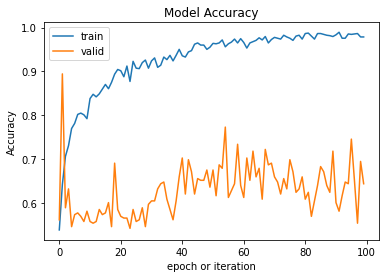

In [22]:
# Summarize the accuracy.

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch or iteration')
plt.legend(["train", 'valid'], loc = 'upper left')
plt.show()

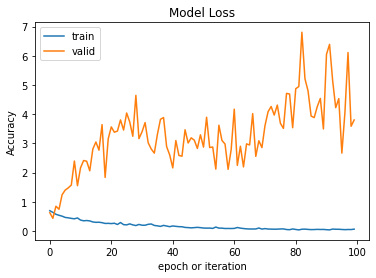

In [23]:
# Summarize the Loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('Accuracy')
plt.xlabel('epoch or iteration')
plt.legend(["train", 'valid'], loc = 'upper left')
plt.show()

# Test images from outside

In [24]:
import numpy as np
import keras
from keras.preprocessing.image import ImageDataGenerator
#from keras.preprocessing import image
from keras.utils import image_utils

# Load or import the Model.

In [25]:
# h.h5 for the Hierarchical Data Format version 5 (HDF5), is an open source file format that supports large, complex, heterogeneous data.
for dirname, _, filenames in os.walk('./working/'):    
    print(dirname)   
    for file in filenames:        
        print(filenames)    

./working/
['horse_human_model.h5']


In [26]:
model_path = './working/horse_human_model.h5'

In [27]:
trained_model = keras.models.load_model(model_path)

# Load Test images

In [28]:
# For testing images 
test_files = list()
for dirname, _, filenames in os.walk('./test-images/'):
    for f in filenames:
        test_files.append(os.path.join(dirname, f)) 

#print (test_files)

In [29]:
def pred_horse_human(model, horse_human):
    test_image = image_utils.load_img(horse_human, target_size = (150, 150))
    test_image = image_utils.img_to_array(test_image)/255
    test_image = np.expand_dims(test_image, axis = 0)
    
    result = model.predict(test_image).round(3)
    
    pred = np.argmax(result)
    print(result, "-->", pred)
    
    if pred == 0:
        print("Predicted as a HORSE")
    else:
        print("Predicted as a HUMAN")

# Predict the Output

In [30]:
for horse_human in test_files:
    pred_horse_human(trained_model, horse_human)

1/1 [==============================] - 0s 223ms/step
[[0.847 0.153]] --> 0
Predicted as a HORSE
1/1 [==============================] - 0s 16ms/step
[[0.755 0.245]] --> 0
Predicted as a HORSE
1/1 [==============================] - 0s 16ms/step
[[0.605 0.395]] --> 0
Predicted as a HORSE
1/1 [==============================] - 0s 22ms/step
[[0.686 0.314]] --> 0
Predicted as a HORSE
1/1 [==============================] - 0s 14ms/step
[[0.392 0.608]] --> 1
Predicted as a HUMAN
1/1 [==============================] - 0s 15ms/step
[[0.658 0.342]] --> 0
Predicted as a HORSE
1/1 [==============================] - 0s 15ms/step
[[0.753 0.247]] --> 0
Predicted as a HORSE
1/1 [==============================] - 0s 16ms/step
[[0.772 0.228]] --> 0
Predicted as a HORSE
1/1 [==============================] - 0s 14ms/step
[[0.542 0.458]] --> 0
Predicted as a HORSE
1/1 [==============================] - 0s 15ms/step
[[0.429 0.571]] --> 1
Predicted as a HUMAN
1/1 [==============================] - 0s 17ms/st

In [31]:
import cv2

In [32]:
def pred_horse_human_image(model, horse_human):
    test_image = image_utils.load_img(horse_human, target_size = (150, 150))
    test_image = image_utils.img_to_array(test_image)/255
    test_image = np.expand_dims(test_image, axis = 0)
    
    result = model.predict(test_image).round(3)
    
    pred = np.argmax(result)
#     print(result, "-->", pred)
    
    if pred == 0:
        prediction = "HORSE"
    else:
        prediction = "HUMAN"

    img = cv2.imread(horse_human)
    img_array = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_array, cmap = 'gray')
    
    plt.axis('off')
    plt.title("PREDICTED AS : " + prediction)
    
    plt.show()

1/1 [==============================] - 0s 17ms/step


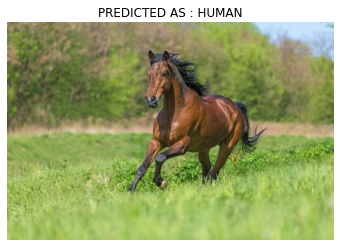

In [33]:
pred_horse_human_image(trained_model, './test-images/7.jpg')

1/1 [==============================] - 0s 16ms/step


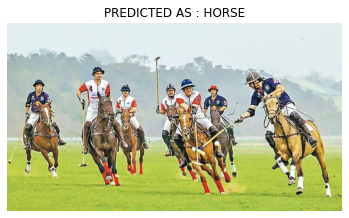

1/1 [==============================] - 0s 25ms/step


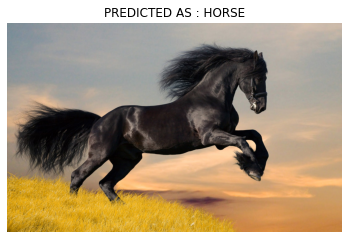

1/1 [==============================] - 0s 15ms/step


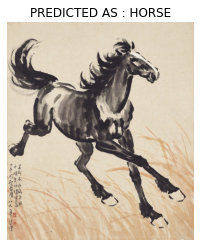

1/1 [==============================] - 0s 16ms/step


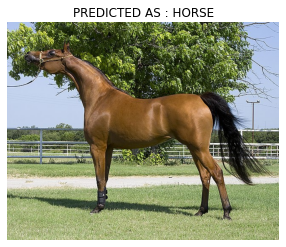

1/1 [==============================] - 0s 16ms/step


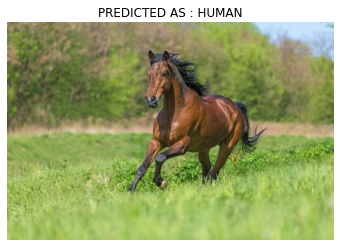

1/1 [==============================] - 0s 19ms/step


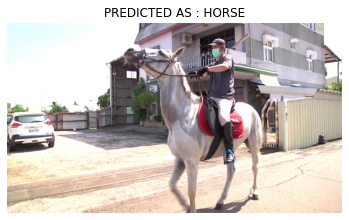

1/1 [==============================] - 0s 15ms/step


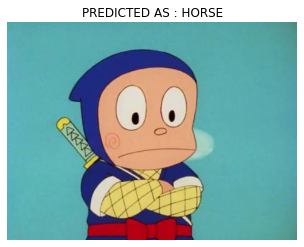

1/1 [==============================] - 0s 21ms/step


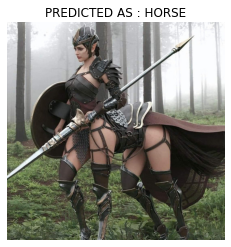

1/1 [==============================] - 0s 16ms/step


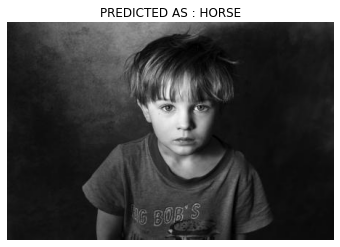

1/1 [==============================] - 0s 16ms/step


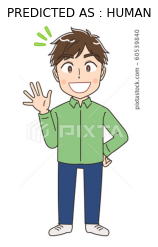

1/1 [==============================] - 0s 15ms/step


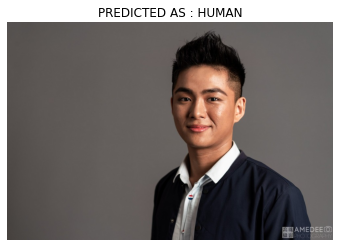

1/1 [==============================] - 0s 17ms/step


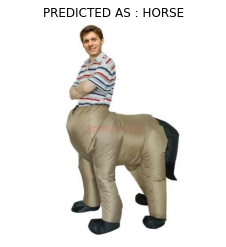

In [34]:
for horse_human in test_files:
    pred_horse_human_image(trained_model, horse_human)

# Visualize intermediate representations

In [35]:
# Directory with our training horse pictures
train_horse_dir = os.path.join('./horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('./horse-or-human/humans')

train_horse_names = os.listdir(train_horse_dir)
# print(train_horse_names[:10])
train_human_names = os.listdir(train_human_dir)
# print(train_human_names[:10])

1/1 [==============================] - 0s 85ms/step


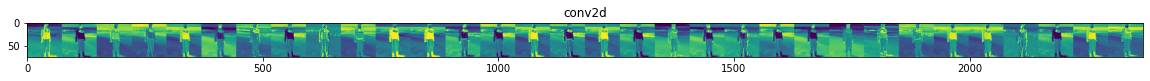

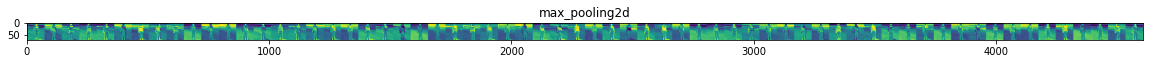

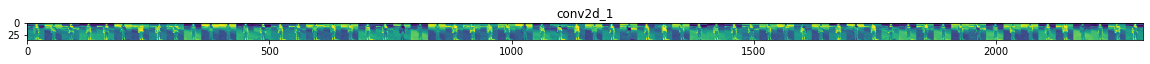

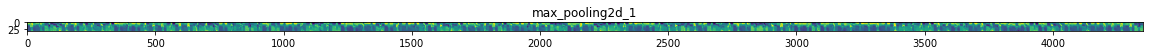

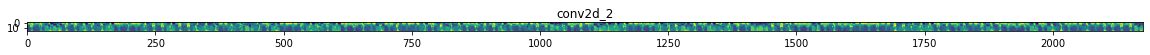

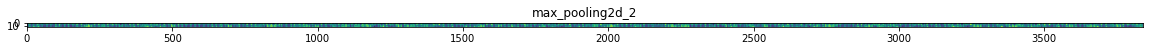

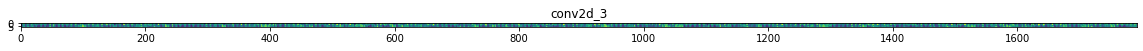

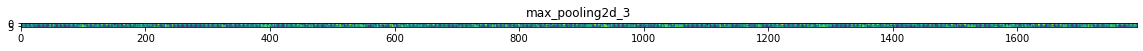

In [36]:
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      #if x>0:
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

# Clean Up

In [37]:
# import os, signal
# os.kill(os.getpid(), signal.SIGKILL)